<h1 style="text-align: center;">Continuous Probability Distributions</h1>
<br>

## Outline of today's lesson:

1. Brief review of finite distributions, discrete distributions, and multivariate distributions.
1. Continuous distributions - the math!
    1.  Probability density function.
    1.  Cumulative distribution function.
    1.  Examples of continuous distributions.
1. Continuous distributions - computing and calculating!
1. Interested in adventuring further?  Stochastic processeses, i.e. "infinite dimensional" multivariate discrete/continuous distributions. 

<br>



### <span style="color: red;">Note that in the following discussion we sometimes discuss direct applications to machine learning in this red font!</span>

To start, let's import some libraries we will be using...

In [38]:
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import IFrame

plt.style.use('ggplot')

%matplotlib widget

## We will review finite distributions first.  

Let's look at the most simple random variable possible, a Bernoulli random variable, which can only take two values: 0 or 1.  In other words it is like flipping a coin.  The "coin" does not have to be fair.  

In [26]:
probabilityOfHeads = .3       # not a fair coin!
coinFlip = scipy.stats.bernoulli(probabilityOfHeads)

Calculate the mean and variance:

In [29]:
coinFlip.mean(), coinFlip.var() # variance = p * (1-p)

(0.3, 0.21)

Sample from the Bernoulli a few times:

In [54]:
coinFlip.rvs(size = 3)

array([1, 0, 0], dtype=int64)

Plot the probability mass function:

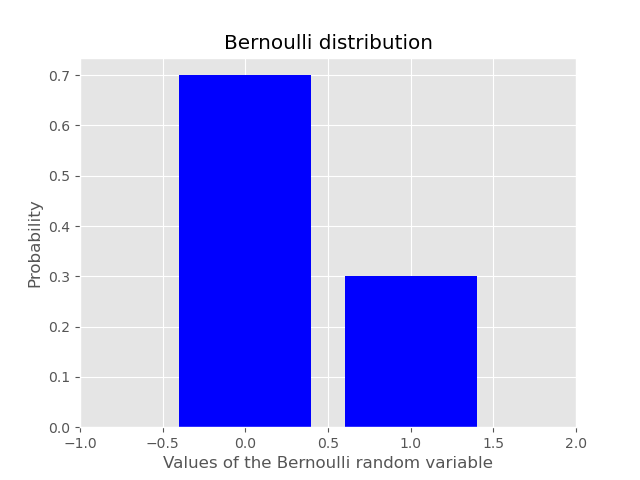

In [37]:
plt.figure()
plt.xlim(-1, 2)
plt.bar([0,1], coinFlip.pmf([0,1]), color='blue')

# For labelling of Bar plot
plt.title('Bernoulli distribution')
plt.xlabel('Values of the Bernoulli random variable')
plt.ylabel('Probability')

plt.show()

### <span style="color: red;">An example of the use of the Bernouilli distribution in machine learning would be a two class classification problem, for example the cats and dogs problem.</span>

Check the SciPy documentation for things you can do with the random variables we explore in this notebook.  Here is the documentation for Bernoulli:

In [75]:
IFrame("https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli", 1100,700)

We can create a general finite random variable using the multinomial distribution with one sample:

In [55]:
nSample = 1
probs = (.1, .4, .2, .1, .1, .1)

categorical = scipy.stats.multinomial(nSample, probs)

### <span style="color: red;">An example of the use of the categorical distribution in machine learning is the distribution over digits in the MNIST problem.</span>

## Discrete distributions generalize finite distributions.  Consider the Poisson distribution:

$$f(k) = \text{Pr}(X = k) = \frac{\mu^k e^{-k}}{k!}  \text{ for k = 0,1,2...}$$

In [59]:
mu = 4  # mu is the only parameter required to specify a Poisson RV and mu turns out to be the mean
poisson = scipy.stats.poisson(mu)

print("Mean: " + str(poisson.mean()))

Mean: 4.0


Even though we only display the probability for the first 20 values of the Poisson distribution, the plot actually "goes to infinity."

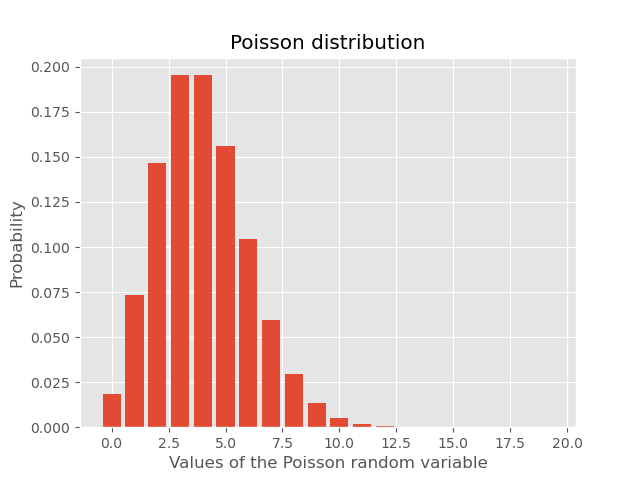

In [68]:
nPoissonValues = 20

valuesOfPoisson = range(nPoissonValues)
partialPMF = poisson.pmf(valuesOfPoisson)

plt.figure()
plt.bar(valuesOfPoisson, partialPMF)

plt.title('Poisson distribution')
plt.xlabel('Values of the Poisson random variable')
plt.ylabel('Probability')

plt.show()

### <span style="color: red;">An example of the use of the Poisson distribution in machine learning is Poisson regression where the mean is dependent on regressors x through the coefficients $$\mu(x) = e^{\theta x}$$ This "machine learning" example is an example of generalized linear regression and "training" this model means we solve for the coefficients $\theta$.  Can you think of a way to use a nonlinear model for the mean $\mu$?
</span>


## Recall multivariate distributions (which give the probabilities for the outcomes of two or more random variables):

For example, toss two fair die independently.  Then $$\text{Pr}(d_1 = 2, d_2 = 5) = \frac{1}{6} \cdot \frac{1}{6} = \frac{1}{36}$$

## Continuous Distributions

##### <span style="color: blue;">Warning:  The following discussion is slightly mathematically simplied and if you decide to dig deeper into probability theory you will find that some of the ideas below will have to be modified.  However for most practical applications this discussion suffices.</span>

1.  A _continuous_ distribution is a distribution over the real numbers $\mathbb{R}$ in the _univariate_ case or a vector space over the reals in the _multivariate_ case, for example $\mathbb{R}^2$.
1.  The probability for any fixed number is 0!
1.  However _intervals_ on the real line, e.g. [5, 9], may have non-zero probability and can be calculated using the _cumulative distribution function_ or integrating the _probability density function_.  We discuss both of these functions now.

- densities can be greater than 1
- densities are analogous to probability mass functions
- compare discrete and continuous uniform
- compare normal and binomial and mention the central limit theorem

## Optional Fun Bonus: Stochastic Processes !

##### <span style="color: blue;">Warning: "Stochastic" is just a fancy word for "random."</span>

1.  A stochastic process is, informally, a indexed collection of random variables $\{X_t\}$ where the index $t$ is often interpreted as "time."
1.  The stochastic process is called discrete or continous if the index $t$ takes values in $\{0,1,2,...\}$ or if $t$ takes values in $\mathbb{R}$ respectively.

### Let's look at a discrete time, two-dimensional _random walk_:

In [95]:
IFrame("https://en.wikipedia.org/wiki/Random_walk", 1000, 700)

### Continuous time, one-dimensional random walk:

In [99]:
IFrame("https://en.wikipedia.org/wiki/Wiener_process#/media/File:Wiener-process-5traces.svg", 700, 500)

### Two dimensional "spatial" Gaussian process:

In [105]:
IFrame("https://research.cs.aalto.fi/pml/software/gpstuff/demo_regression1.shtml",1100,400)

In [104]:
IFrame("https://scikit-learn.org/stable/modules/gaussian_process.html", 1100, 400)

In [106]:
IFrame("https://en.wikipedia.org/wiki/Neural_network_Gaussian_process", 1100, 400)